In [1]:
import pandas as pd
import numpy as np

Please load "cardio_base.csv"
This is a health dataset. Each row represents a person and corresponding attributes like age, height, weight, blood pressure, cholesterol level etc.
When asked about age, please calculate with age in years rounded down.

1. How much heavier is the age group with the highest average weight than the age group with the lowest weight?
2. Do people over 50 have higher cholesterol levels than the rest?
3. Are men more likely to be a smoker than women?
4. How tall are the tallest 1% of people?
5. Which two features have the highest spearman rank correlation?
6. What percentage of people are more than 2 standard deviations far from the average height?
7. What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol consumption information!
8. Which of the following statements is true with 95% confidence?
    - Smokers have higher blood presure than non-smokers
    - Smokers have higher cholesterol level than non-smokers
    - Smokers weight less than non smokers
    - Men have higher blood pressure than women
9. When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?
10. Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?
11. Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.
12. What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!
13. What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [2]:
cardio_b = pd.read_csv("cardio_base.csv")

In [3]:
cardio_b.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [7]:
cardio_b['years'] = (cardio_b['age']/365).astype(int)
cardio_b.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


1. How much heavier is the age group with the highest average weight than the age group with the lowest weight?

In [24]:
weightbyagegroupls = cardio_b.groupby('years')['weight'].mean()
(weightbyagegroupls.max()/ weightbyagegroupls.min()) - 1

0.2859952671226089

2. Do people over 50 have higher cholesterol levels than the rest?

In [21]:
avg_cholestrol_by_age = cardio_b.groupby('years')['cholesterol'].mean()
(avg_cholestrol_by_age[avg_cholestrol_by_age.index > 50].mean()/avg_cholestrol_by_age[avg_cholestrol_by_age.index <= 50].mean())-1

0.1951082506505808

3. Are men more likely to be a smoker than women?

In [25]:
num_smoker_by_gender = cardio_b.groupby('gender').agg({'smoke': 'sum'})
num_smoker_by_gender

,smoke
gender,
1,813
2,5356


In [31]:
num_smoker_by_gender[num_smoker_by_gender.index == 2]['smoke'].item() /  num_smoker_by_gender[num_smoker_by_gender.index == 1]['smoke'].item()

6.587945879458794

4. How tall are the tallest 1% of people?

In [34]:
cardio_b['height'].quantile(0.99)

184.0

5. Which two features have the highest spearman rank correlation?

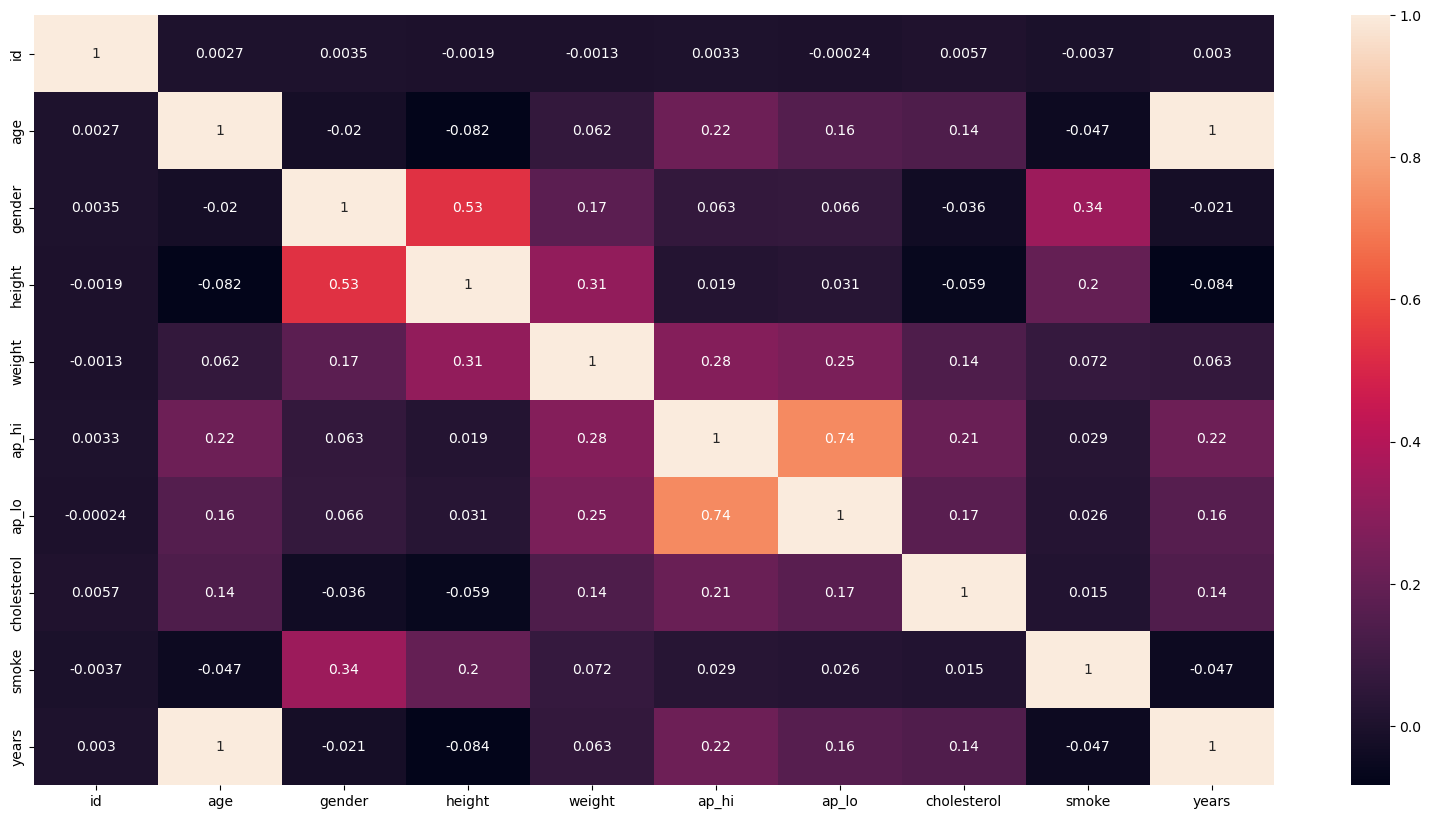

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
corr = cardio_b.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

6. What percentage of people are more than 2 standard deviations far from the average height?

In [49]:
height_avg = cardio_b.height.mean()
height_std = cardio_b.height.std()
len(cardio_b[abs(cardio_b.height - height_avg) > (2 * height_std)])/len(cardio_b.height)*100

3.3357142857142854

In [44]:
height_std

164.35922857142856

In [43]:
height_std

8.210126364538139

7. What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol consumption information!

In [61]:
cardio_alco_df = pd.read_csv('cardio_alco.csv', sep=";")
cardio_alco_df.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [62]:
cardio_b_a = pd.merge(cardio_b, cardio_alco_df, on='id')
cardio_b_a.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,years,alco
0,44,14605,1,159,60.0,110,70,1,0,40,0
1,45,20652,1,160,73.0,130,85,1,0,56,0
2,46,21940,2,173,82.0,140,90,3,0,60,0
3,47,20404,1,163,55.0,120,80,1,0,55,0
4,49,18328,2,175,95.0,120,80,1,0,50,0


In [64]:
cardio_over_50_df = cardio_b_a[cardio_b_a['years'] > 50]
len(cardio_over_50_df[cardio_over_50_df['alco'] == 1])/len(cardio_over_50_df)*100

4.908607691056028

8. Which of the following statements is true with 95% confidence?
    - Smokers have higher blood presure than non-smokers
    - Smokers have higher cholesterol level than non-smokers
    - Smokers weight less than non smokers
    - Men have higher blood pressure than women

In [65]:
cardio_b_a['ap_mean'] = (cardio_b_a['ap_hi'] + cardio_b_a['ap_lo']) / 2
cardio_b_a.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,years,alco,ap_mean
0,44,14605,1,159,60.0,110,70,1,0,40,0,90.0
1,45,20652,1,160,73.0,130,85,1,0,56,0,107.5
2,46,21940,2,173,82.0,140,90,3,0,60,0,115.0
3,47,20404,1,163,55.0,120,80,1,0,55,0,100.0
4,49,18328,2,175,95.0,120,80,1,0,50,0,100.0


In [67]:
stat_ap_mean_by_smoke_df = cardio_b_a.groupby('smoke')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_smoke_df['ci95_hi'] = stat_ap_mean_by_smoke_df['mean'] + 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df['ci95_lo'] = stat_ap_mean_by_smoke_df['mean'] - 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,112.851959,0.562122,113.953718,111.750200
1,113.139016,1.241633,115.572617,110.705415


In [69]:
stat_cholesterol_by_smoke_df = cardio_b_a.groupby('smoke')['cholesterol'].agg(['mean', 'sem'])
stat_cholesterol_by_smoke_df['ci95_hi'] = stat_cholesterol_by_smoke_df['mean'] + 1.96 * stat_cholesterol_by_smoke_df['sem']
stat_cholesterol_by_smoke_df['ci95_lo'] = stat_cholesterol_by_smoke_df['mean'] - 1.96 * stat_cholesterol_by_smoke_df['sem']
stat_cholesterol_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,1.365668,0.002989,1.371526,1.359810
1,1.390554,0.009616,1.409401,1.371706


In [70]:
stat_weight_by_smoke_df = cardio_b_a.groupby('smoke')['weight'].agg(['mean', 'sem'])
stat_weight_by_smoke_df['ci95_hi'] = stat_weight_by_smoke_df['mean'] + 1.96 * stat_weight_by_smoke_df['sem']
stat_weight_by_smoke_df['ci95_lo'] = stat_weight_by_smoke_df['mean'] - 1.96 * stat_weight_by_smoke_df['sem']
stat_weight_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,73.853289,0.062684,73.976150,73.730429
1,77.356142,0.212276,77.772203,76.940081


In [71]:
stat_ap_mean_by_gender_df = cardio_b_a.groupby('gender')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_gender_df['ci95_hi'] = stat_ap_mean_by_gender_df['mean'] + 1.96 * stat_ap_mean_by_gender_df['sem']
stat_ap_mean_by_gender_df['ci95_lo'] = stat_ap_mean_by_gender_df['mean'] - 1.96 * stat_ap_mean_by_gender_df['sem']
stat_ap_mean_by_gender_df

,mean,sem,ci95_hi,ci95_lo
gender,,,,
1,111.749641,0.636337,112.996862,110.502421
2,114.965621,0.918838,116.766543,113.164699


In [75]:
covid = pd.read_csv('covid_data.csv')
covid['date'] = pd.to_datetime(covid.date)
covid.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


9. When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?

In [77]:
germany_covid_df = covid[covid.location == "Germany"]
italy_covid_df = covid[covid.location == "Italy"]

germany_covid_df["cumsum"] = germany_covid_df.new_cases.cumsum()
italy_covid_df["cumsum"] = italy_covid_df.new_cases.cumsum()
gr_it = pd.merge(germany_covid_df, italy_covid_df, on='date')
gr_it

C:\Users\HITMAN1337X\AppData\Local\Temp\ipykernel_12204\4170911220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_covid_df["cumsum"] = germany_covid_df.new_cases.cumsum()
C:\Users\HITMAN1337X\AppData\Local\Temp\ipykernel_12204\4170911220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_covid_df["cumsum"] = italy_covid_df.new_cases.cumsum()


,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsum_x,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsum_y
0,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
1,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
2,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
3,Germany,2020-01-03,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
4,Germany,2020-01-04,0,0,83783945.0,21.453,45229.245,8.0,0,Italy,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278


In [78]:
gr_it[abs(gr_it.cumsum_x - gr_it.cumsum_y) > 10000]['date'].min()

Timestamp('2020-03-12 00:00:00')

10. Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

<Axes: xlabel='date', ylabel='cumsum'>

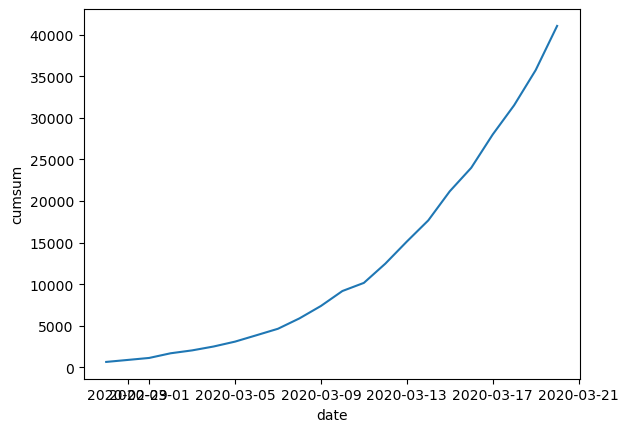

In [80]:
italy_cumsum_case_in_time_df = italy_covid_df[(italy_covid_df.date >= "2020-02-28") & (italy_covid_df.date <= "2020-03-20")]
sns.lineplot(data=italy_cumsum_case_in_time_df, x='date', y='cumsum')

In [88]:
italy_cumsum_case_in_time_df['ts'] = italy_cumsum_case_in_time_df.date.astype('int64') // 10**9
italy_cumsum_case_in_time_df['ts'] -= italy_cumsum_case_in_time_df['ts'].min()
x = italy_cumsum_case_in_time_df['ts']
y = italy_cumsum_case_in_time_df['cumsum']
p = np.polyfit(x, np.log(y), 1)
print(p)
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
print(a, b)
y_fitted = a * np.exp(b * x)
print(y_fitted)

[2.24520424e-06 6.80040490e+00]
898.2109026485551 2.2452042412439063e-06
10747      898.210903
10748     1090.498866
10749     1323.951616
10750     1607.381664
10751     1951.488092
10752     2369.260431
10753     2876.468995
10754     3492.260188
10755     4239.879256
10756     5147.547759
10757     6249.528897
10758     7587.420896
10759     9211.727285
10760    11183.763329
10761    13577.970594
10762    16484.727012
10763    20013.758520
10764    24298.281057
10765    29500.029281
10766    35815.361815
10767    43482.673517
10768    52791.394540
Name: ts, dtype: float64


C:\Users\HITMAN1337X\AppData\Local\Temp\ipykernel_12204\624880521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_cumsum_case_in_time_df['ts'] = italy_cumsum_case_in_time_df.date.astype('int64') // 10**9
C:\Users\HITMAN1337X\AppData\Local\Temp\ipykernel_12204\624880521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_cumsum_case_in_time_df['ts'] -= italy_cumsum_case_in_time_df['ts'].min()


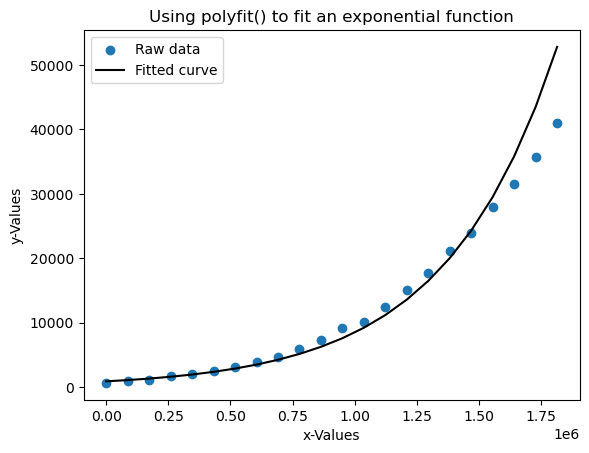

In [89]:
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

In [90]:
italy_data_2020_03_20 = italy_cumsum_case_in_time_df[italy_cumsum_case_in_time_df['date'] == '2020-03-20']
italy_data_2020_03_20

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsum,ts
10768,Italy,2020-03-20,5322,429,60461828.0,23.021,35220.084,3.18,41035,1814400


In [91]:
x_test = italy_data_2020_03_20['ts'].item()
y_test = italy_data_2020_03_20['cumsum'].item()
y_pred = a * np.exp(b * x_test)
print(x_test, y_test, y_pred)
print(y_pred - y_test)

1814400 41035 52791.39454048472
11756.394540484718


11. Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [93]:
country_death_rate_df = covid.groupby('location').agg({'new_deaths': 'sum', 'population': 'mean', 'aged_65_older_percent': 'first'})
country_death_rate_df['death_rate'] = country_death_rate_df['new_deaths'] / country_death_rate_df['population'] * 1000000
country_death_rate_df.sort_values(by='death_rate', ascending=False)

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


12. What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!

In [94]:
country_death_rate_dropna_df = country_death_rate_df.dropna()
country_death_rate_dropna_df

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Afghanistan,384,3.892834e+07,2.581,9.864279
Albania,34,2.877800e+06,13.188,11.814581
Algeria,724,4.385104e+07,6.211,16.510440
Angola,4,3.286627e+07,2.405,0.121705
Antigua and Barbuda,3,9.792800e+04,6.933,30.634752
...,...,...,...,...
Vietnam,0,9.733858e+07,7.150,0.000000
World,411195,7.794799e+09,8.696,52.752485
Yemen,127,2.982597e+07,2.922,4.258034


In [95]:
country_aged_65_over_20_percent = country_death_rate_dropna_df[country_death_rate_dropna_df.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [96]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [97]:
from sklearn.metrics import f1_score
y_pred = [1] * len(country_aged_65_over_20_percent)
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
f1_score(y_true, y_pred)

0.7272727272727273

13. What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [101]:
gdp_beds_by_country_df = covid.groupby('location')[['gdp_per_capita', 'hospital_beds_per_thousand']].agg('first').dropna()
gdp_beds_by_country_df

,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [102]:
country_at_least_5_beds_per_thousand_hospitals = gdp_beds_by_country_df[gdp_beds_by_country_df.hospital_beds_per_thousand >= 5]
country_at_least_5_beds_gdp_over_10000 = country_at_least_5_beds_per_thousand_hospitals[country_at_least_5_beds_per_thousand_hospitals.gdp_per_capita > 10000]
# country_at_least_5_beds_per_thousand_hospitals
len(country_at_least_5_beds_gdp_over_10000)/len(country_at_least_5_beds_per_thousand_hospitals)

0.8846153846153846